In [51]:
# [Muhammad, Haisam]
# [20195819]
# [MMA]
# [Winter]
# [869]
# [12-08-2020]

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 
import pandas_profiling
import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# This will ensure that matplotlib figures don't get cut off when saving with savefig()
rcParams.update({'figure.autolayout': True})
import cufflinks as cf
%matplotlib inline

In [52]:
# Answer to Question [1], Part [a]

In [53]:
#loading the data
df = pd.read_csv('jewelry_customers.csv')

In [54]:
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [55]:
#Checking if the data has any missing values
df.isna().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [56]:
# Answer to Question [1], Part [b]

In [58]:
#Using pycaret to preprocess the data for clustering algorithms 

In [57]:
#import clustering module
from pycaret.clustering import *

#intialize the setup
clu1 = setup(df, remove_multicollinearity = True, multicollinearity_threshold = 0.9, 
             session_id=123, log_experiment=True, log_plots = True, 
             transformation=True,
             pca=True,pca_components=0.99,pca_method='linear',
             ignore_low_variance = True, group_features = ['Income','Savings','Age'] )
             


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(505, 4)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                ('clean_names', Clean_Colum_Names()),
                ('fix_multi',
                 Fix_mul

In [59]:
# creating k-means model
kmeans = create_model('kmeans')

# assign labels using trained model
kmeans_df = assign_model(kmeans)

INFO:logs:(505, 5)
INFO:logs:assign_model() succesfully completed......................................


<Figure size 432x288 with 0 Axes>

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), plot=cluster, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: cluster
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Copying data
INFO:logs:Transformation param set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:Preparing display monitor
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:(505, 5)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting PCA()
INFO:logs:Sorting dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), plot=elbow, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: elbow
INFO:logs:Fitting KElbowVisualizer()
INFO:logs:Rendering Visual


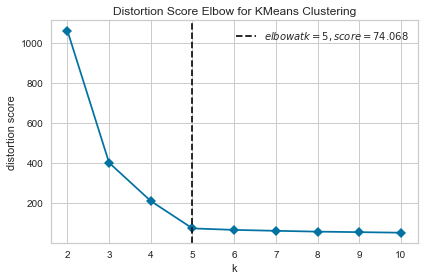

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), plot=silhouette, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: silhouette
INFO:logs:Fitting SilhouetteVisualizer()
INFO:logs:Rendering Visual


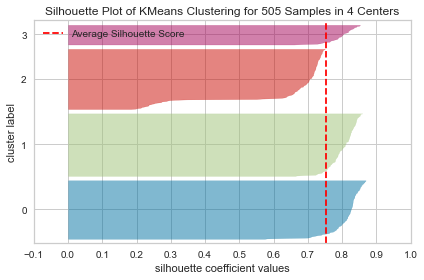

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), plot=distribution, feature=None, label=False, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:plot type: distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=False, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Copying data
INFO:logs:Preparing display monitor
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:(505, 5)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [60]:
plot_model(model = kmeans, plot = 'cluster')
plot_model(model = kmeans, plot = 'elbow')
plot_model(model = kmeans, plot = 'silhouette')
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [61]:
#Using k = 5 as per the k-elbow visualizer 

kmeans = create_model('kmeans', num_clusters = 5)

,Metric
Silhouette,0.8015
Calinski-Harabasz,3284.0068
Davies-Bouldin,0.2766


INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_models() succesfully completed......................................


<Figure size 432x288 with 0 Axes>

In [62]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()
kmeans_results['Cluster'].value_counts()

INFO:logs:(505, 5)
INFO:logs:assign_model() succesfully completed......................................


,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 1
1,59,81799,0.791082,5417.661426,Cluster 1
2,62,74751,0.702657,9258.992965,Cluster 1
3,59,74373,0.765680,7346.334504,Cluster 1
4,87,17760,0.348778,16869.507130,Cluster 0


Cluster 1    157
Cluster 0    147
Cluster 2    126
Cluster 3     50
Cluster 4     25
Name: Cluster, dtype: int64

In [63]:
# Answer to Question [1], Part [c]

In [64]:
kmeans_results.groupby('Cluster').describe().transpose()

Cluster                 Cluster 0     Cluster 1      Cluster 2      Cluster 3  \
Age           count    147.000000    157.000000     126.000000      50.000000   
              mean      87.775510     59.955414      32.777778      24.180000   
              std        3.508885      3.376662       3.792390       3.662775   
              min       79.000000     51.000000      22.000000      17.000000   
              25%       85.000000     58.000000      30.000000      22.000000   
              50%       88.000000     59.000000      33.000000      24.500000   
              75%       91.000000     62.000000      35.000000      27.000000   
              max       97.000000     68.000000      44.000000      31.000000   
Income        count    147.000000    157.000000     126.000000      50.000000   
              mean   27866.102041  72448.063694  105265.809524  128029.120000   
              std     6448.805481   6240.260008    6080.621753    5688.904656   
              min    12000.000000  56321.000000   89598.000000  117108.000000   
              25%    23361.000000  68463.000000  100760.250000  123042.000000   
              50%    27771.000000  72027.000000  106002.500000  128162.000000   
              75%    32601.000000  76594.000000  108858.750000  131435.750000   
              max    46977.000000  90422.000000  119877.000000  142000.000000   
SpendingScore count    147.000000    157.000000     126.000000      50.000000   
              mean       0.328800      0.771518       0.309926       0.896892   
              std        0.045224      0.046058       0.045513       0.043466   
              min        0.203140      0.657314       0.174120       0.806553   
              25%        0.301502      0.740367       0.281237       0.871957   
              50%        0.324719      0.766720       0.309479       0.890676   
              75%        0.357267      0.800598       0.341096       0.926473   
              max        0.473550      0.910417       0.411112       1.000000   
Savings       count    147.000000    157.000000     126.000000      50.000000   
              mean   16659.261445   6889.972190   14962.778066    4087.520309   
              std     1183.850178   1052.276354    1061.734017    1277.754801   
              min    13470.970605   4077.658657   12207.526078       0.000000   
              25%    15957.282919   6225.376082   14223.787562    3275.320193   
              50%    16711.067980   6845.056822   14976.943192    4361.967019   
              75%    17433.126684   7497.231607   15682.288845    4986.863329   
              max    20000.000000  10547.775368   17968.553929    6089.478323   

Cluster                  Cluster 4  
Age           count      25.000000  
              mean       86.000000  
              std         3.662877  
              min        77.000000  
              25%        84.000000  
              50%        86.000000  
              75%        88.000000  
              max        93.000000  
Income        count      25.000000  
              mean   119944.040000  
              std      4941.052254  
              min    110582.000000  
              25%    117347.000000  
              50%    119429.000000  
              75%    123651.000000  
              max    128596.000000  
SpendingScore count      25.000000  
              mean        0.068378  
              std         0.039744  
              min         0.000000  
              25%         0.036795  
              50%         0.063273  
              75%         0.082723  
              max         0.155694  
Savings       count      25.000000  
              mean    14808.683793  
              std      1159.339639  
              min     12554.692742  
              25%     14047.388986  
              50%     14773.407206  
              75%     15391.952192  
              max     17833.093470

In [66]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
